In [2]:
import numpy as np
#from matplotlib import rcParams
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import sys

In [3]:
matplotlib.rc('font', **{'family':'serif', 'serif':['Computer Modern']})
matplotlib.rc('text', usetex=True)

#plt.rcParams["font.family"] = "serif"
plt.rc('axes', linewidth=1.25)
plt.rc('xtick.major', size=5, width=1.25)
plt.rc('xtick.minor', size=5, width=1.25)
plt.rc('ytick.major', size=5, width=1.25)
plt.rc('ytick.minor', size=5, width=1.25)
ticklabelsize=11
legendlabelsize=12
axislabelsize=20

In [4]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

In [5]:
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

In [6]:
imp=np.loadtxt("/localscratch/asourpis/metadata_MOGON/ccn_h2o_0.25_0.75/75/nvt_pro_run/0.0-V_nm/net_dipole_clst/test.txt")
imp1e_6=np.loadtxt("/localscratch/asourpis/metadata_MOGON/ccn_h2o_0.25_0.75/75/nvt_pro_run/1e-6-V_nm/net_dipole_clst/dipoles/dipoles.txt")
imp1e_5=np.loadtxt("/localscratch/asourpis/metadata_MOGON/ccn_h2o_0.25_0.75/75/nvt_pro_run/1e-5-V_nm/net_dipole_clst/dipoles/dipoles.txt")
imple_03Vnm=np.loadtxt("/localscratch/asourpis/metadata_MOGON/ccn_h2o_0.25_0.75/75/nvt_pro_run/0.3-V_nm/net_dipole_clst/dipoles/dipoles.txt")

In [8]:
imple_03Vnm

array([[ 1.00000000e+00,  6.89629452e+01,  1.45998667e+01,
        -1.46659490e+01,  7.20009304e+01],
       [ 2.00000000e+00,  1.03978235e+02,  2.02667209e+01,
         1.13758812e+01,  1.06544000e+02],
       [ 3.00000000e+00,  8.97045079e+01, -1.93827475e+01,
        -9.94867334e+00,  9.23123271e+01],
       ...,
       [ 2.49980000e+04,  5.43402305e+01,  1.54335245e-01,
         3.58167578e-01,  5.43416301e+01],
       [ 2.49990000e+04,  4.64644232e+01,  1.08615904e+01,
        -1.03731031e+00,  4.77283227e+01],
       [ 2.50000000e+04,  5.50399162e+01, -6.98937893e-01,
        -9.61743322e+00,  5.58782240e+01]])

In [10]:
imp[:,1]

array([  9.47510861,   8.97838028,  -7.2386145 , ...,  12.0603594 ,
       -24.8354289 ,  24.1205826 ])

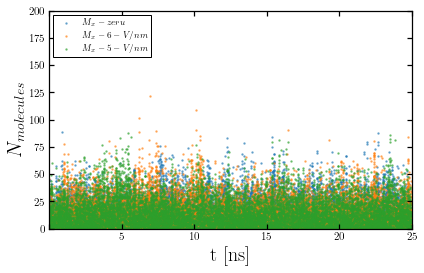

In [6]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,25,0,200)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(0.6/ax.get_data_ratio())

plt.xlabel(r't [ns]',fontsize=axislabelsize)
plt.ylabel(r'$N_{molecules}$',fontsize=axislabelsize)
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.scatter(imp[:,0]/1000, imp[:,1], alpha=0.5,s=2.2, label=r'$M_{x}-zeru$')
plt.scatter(imp1e_6[:,0]/1000, imp1e_6[:,1], alpha=0.5,s=2.2, label=r'$M_{x}-6-V/nm$')
plt.scatter(imp1e_5[:,0]/1000, imp1e_5[:,1], alpha=0.5,s=2.2, label=r'$M_{x}-5-V/nm$')

#plt.scatter(imp[:,0]/1000, imp[:,2], alpha=0.5,s=2.2,label=r'$M_{y}$')
#plt.scatter(imp[:,0]/1000, imp[:,3], alpha=0.5,s=2.2, label=r'$M_{z}$')

#plt.scatter(bigclst03V_nm[:,0]/1000, bigclst03V_nm[:,1], alpha=0.5,s=0.5)
#plt.show()

plt.legend(loc='upper left',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=0.75*legendlabelsize)


#plt.axvline(x=15.205, color=tableau20[0])
#plt.axvline(x=10.169, color=tableau20[2])
#plt.axvline(x=23.591, color=tableau20[4])

#fig.suptitle('Bigger Cluster per ps', fontsize=20)
#plt.savefig("bigclusteref_hbonds.pdf",bbox_inches='tight')
plt.tight_layout()

In [29]:
np.mean(np.abs(imp[:,1]))

15.50411670613638

In [30]:
np.mean(np.abs(imp[:,2]))

15.740088169010093

In [31]:
np.mean(np.abs(imp[:,3]))

15.42965271755556

In [32]:
np.mean(np.abs(imp1e_6[:,1]))

15.570777938149998

In [33]:
np.mean(np.abs(imp1e_6[:,2]))

15.003384630567085

In [34]:
np.mean(np.abs(imp1e_6[:,3]))

15.331282901658067

In [35]:
[np.mean(imp[:,1]),np.mean(imp[:,2]),np.mean(imp[:,3])]

[0.09520032055527823, -0.04980706375603516, 0.03084357480204596]

In [36]:
[np.mean(imp1e_6[:,1]),np.mean(imp1e_6[:,2]),np.mean(imp1e_6[:,3])]

[0.3045413850209486, 0.22360834276975278, 0.7913705131805885]

In [9]:
[np.mean(imp1e_5[:,1]),np.mean(imp1e_5[:,2]),np.mean(imp1e_5[:,3])]

[-0.15921936180402263, 0.15542272698233756, 0.25861495429337944]

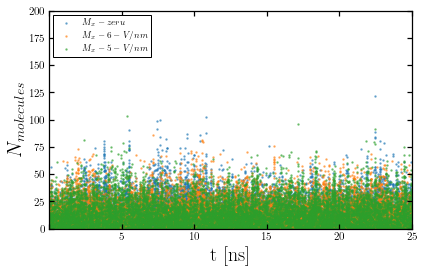

In [7]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,25,0,200)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(0.6/ax.get_data_ratio())

plt.xlabel(r't [ns]',fontsize=axislabelsize)
plt.ylabel(r'$N_{molecules}$',fontsize=axislabelsize)
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()

plt.scatter(imp[:,0]/1000, imp[:,2], alpha=0.5,s=2.2, label=r'$M_{x}-zeru$')
plt.scatter(imp1e_6[:,0]/1000, imp1e_6[:,2], alpha=0.5,s=2.2, label=r'$M_{x}-6-V/nm$')
plt.scatter(imp1e_5[:,0]/1000, imp1e_5[:,2], alpha=0.5,s=2.2, label=r'$M_{x}-5-V/nm$')

#plt.scatter(imp[:,0]/1000, imp[:,2], alpha=0.5,s=2.2,label=r'$M_{y}$')
#plt.scatter(imp[:,0]/1000, imp[:,3], alpha=0.5,s=2.2, label=r'$M_{z}$')

#plt.scatter(bigclst03V_nm[:,0]/1000, bigclst03V_nm[:,1], alpha=0.5,s=0.5)
#plt.show()

plt.legend(loc='upper left',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=0.75*legendlabelsize)


#plt.axvline(x=15.205, color=tableau20[0])
#plt.axvline(x=10.169, color=tableau20[2])
#plt.axvline(x=23.591, color=tableau20[4])

#fig.suptitle('Bigger Cluster per ps', fontsize=20)
#plt.savefig("bigclusteref_hbonds.pdf",bbox_inches='tight')
plt.tight_layout()

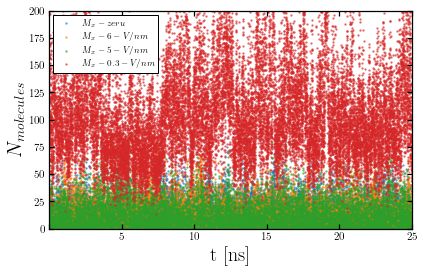

In [11]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,25,0,200)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(0.6/ax.get_data_ratio())

plt.xlabel(r't [ns]',fontsize=axislabelsize)
plt.ylabel(r'$N_{molecules}$',fontsize=axislabelsize)
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.scatter(imp[:,0]/1000, imp[:,1], alpha=0.5,s=2.2, label=r'$M_{x}-zeru$')
plt.scatter(imp1e_6[:,0]/1000, imp1e_6[:,1], alpha=0.5,s=2.2, label=r'$M_{x}-6-V/nm$')
plt.scatter(imp1e_5[:,0]/1000, imp1e_5[:,1], alpha=0.5,s=2.2, label=r'$M_{x}-5-V/nm$')
plt.scatter(imple_03Vnm[:,0]/1000, imple_03Vnm[:,1], alpha=0.5,s=2.2, label=r'$M_{x}-0.3-V/nm$')

#plt.scatter(imp[:,0]/1000, imp[:,2], alpha=0.5,s=2.2,label=r'$M_{y}$')
#plt.scatter(imp[:,0]/1000, imp[:,3], alpha=0.5,s=2.2, label=r'$M_{z}$')

#plt.scatter(bigclst03V_nm[:,0]/1000, bigclst03V_nm[:,1], alpha=0.5,s=0.5)
#plt.show()

plt.legend(loc='upper left',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=0.75*legendlabelsize)


#plt.axvline(x=15.205, color=tableau20[0])
#plt.axvline(x=10.169, color=tableau20[2])
#plt.axvline(x=23.591, color=tableau20[4])

#fig.suptitle('Bigger Cluster per ps', fontsize=20)
#plt.savefig("bigclusteref_hbonds.pdf",bbox_inches='tight')
plt.tight_layout()

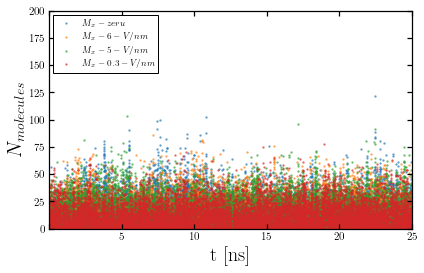

In [12]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,25,0,200)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(0.6/ax.get_data_ratio())

plt.xlabel(r't [ns]',fontsize=axislabelsize)
plt.ylabel(r'$N_{molecules}$',fontsize=axislabelsize)
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.scatter(imp[:,0]/1000, imp[:,2], alpha=0.5,s=2.2, label=r'$M_{x}-zeru$')
plt.scatter(imp1e_6[:,0]/1000, imp1e_6[:,2], alpha=0.5,s=2.2, label=r'$M_{x}-6-V/nm$')
plt.scatter(imp1e_5[:,0]/1000, imp1e_5[:,2], alpha=0.5,s=2.2, label=r'$M_{x}-5-V/nm$')
plt.scatter(imple_03Vnm[:,0]/1000, imple_03Vnm[:,2], alpha=0.5,s=2.2, label=r'$M_{x}-0.3-V/nm$')

#plt.scatter(imp[:,0]/1000, imp[:,2], alpha=0.5,s=2.2,label=r'$M_{y}$')
#plt.scatter(imp[:,0]/1000, imp[:,3], alpha=0.5,s=2.2, label=r'$M_{z}$')

#plt.scatter(bigclst03V_nm[:,0]/1000, bigclst03V_nm[:,1], alpha=0.5,s=0.5)
#plt.show()

plt.legend(loc='upper left',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=0.75*legendlabelsize)


#plt.axvline(x=15.205, color=tableau20[0])
#plt.axvline(x=10.169, color=tableau20[2])
#plt.axvline(x=23.591, color=tableau20[4])

#fig.suptitle('Bigger Cluster per ps', fontsize=20)
#plt.savefig("bigclusteref_hbonds.pdf",bbox_inches='tight')
plt.tight_layout()

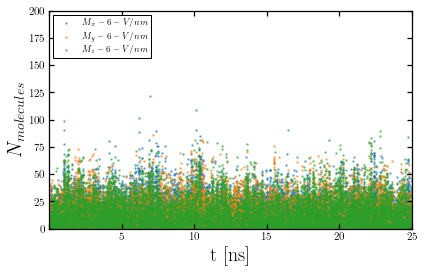

In [13]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,25,0,200)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(0.6/ax.get_data_ratio())

plt.xlabel(r't [ns]',fontsize=axislabelsize)
plt.ylabel(r'$N_{molecules}$',fontsize=axislabelsize)
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.scatter(imp1e_6[:,0]/1000, imp1e_6[:,1], alpha=0.5,s=2.2, label=r'$M_{x}-6-V/nm$')
plt.scatter(imp1e_6[:,0]/1000, imp1e_6[:,2], alpha=0.5,s=2.2, label=r'$M_{y}-6-V/nm$')
plt.scatter(imp1e_6[:,0]/1000, imp1e_6[:,3], alpha=0.5,s=2.2, label=r'$M_{z}-6-V/nm$')

#plt.scatter(imp[:,0]/1000, imp[:,2], alpha=0.5,s=2.2,label=r'$M_{y}$')
#plt.scatter(imp[:,0]/1000, imp[:,3], alpha=0.5,s=2.2, label=r'$M_{z}$')

#plt.scatter(bigclst03V_nm[:,0]/1000, bigclst03V_nm[:,1], alpha=0.5,s=0.5)
#plt.show()

plt.legend(loc='upper left',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=0.75*legendlabelsize)


#plt.axvline(x=15.205, color=tableau20[0])
#plt.axvline(x=10.169, color=tableau20[2])
#plt.axvline(x=23.591, color=tableau20[4])

#fig.suptitle('Bigger Cluster per ps', fontsize=20)
#plt.savefig("bigclusteref_hbonds.pdf",bbox_inches='tight')
plt.tight_layout()

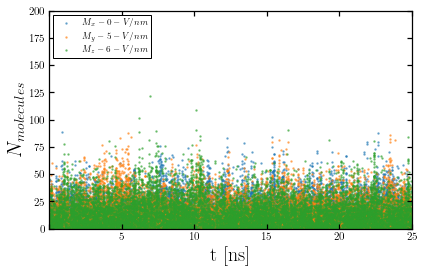

In [16]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,25,0,200)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(0.6/ax.get_data_ratio())

plt.xlabel(r't [ns]',fontsize=axislabelsize)
plt.ylabel(r'$N_{molecules}$',fontsize=axislabelsize)
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()

plt.scatter(imp1e_5[:,0]/1000, imp[:,1], alpha=0.5,s=2.2, label=r'$M_{x}-0-V/nm$')
plt.scatter(imp1e_5[:,0]/1000, imp1e_5[:,1], alpha=0.5,s=2.2, label=r'$M_{y}-5-V/nm$')
plt.scatter(imp1e_5[:,0]/1000, imp1e_6[:,1], alpha=0.5,s=2.2, label=r'$M_{z}-6-V/nm$')

#plt.scatter(imp[:,0]/1000, imp[:,2], alpha=0.5,s=2.2,label=r'$M_{y}$')
#plt.scatter(imp[:,0]/1000, imp[:,3], alpha=0.5,s=2.2, label=r'$M_{z}$')

#plt.scatter(bigclst03V_nm[:,0]/1000, bigclst03V_nm[:,1], alpha=0.5,s=0.5)
#plt.show()

plt.legend(loc='upper left',frameon=True,shadow=False,edgecolor='black',fancybox=False,framealpha=1.0,fontsize=0.75*legendlabelsize)


#plt.axvline(x=15.205, color=tableau20[0])
#plt.axvline(x=10.169, color=tableau20[2])
#plt.axvline(x=23.591, color=tableau20[4])

#fig.suptitle('Bigger Cluster per ps', fontsize=20)
#plt.savefig("bigclusteref_hbonds.pdf",bbox_inches='tight')
plt.tight_layout()

In [7]:
import pandas as pd

In [8]:
datamxzerotot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtotxzerofull.dat")
datamyzerotot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtotyzerofull.dat")
datamzzerotot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtotzzerofull.dat")

In [7]:
res=[(np.sum(datamxtot[i]*datamxtot[0])/(i+1))/(np.sum(datamxtot[0]*datamxtot[0])/(i+1)) for i in range(len(datamxtot)-1)]

NameError: name 'datamxtot' is not defined

In [19]:
def autocorr(data):
    nom=0
    pol=0
    den=0
    res=[]
    for i in range(len(data)):
        nom+=(data[i]*data[0])/(i+1)
        pol+=(data[i]/(i+1))*(data[i]/(i+1))
        den+=(data[i]*data[i])/(i+1)
        res.append((nom+pol)/(den+pol))
    return res

In [68]:
def autocorrnew(data):
    nom1=0
    nom2=0
    pol=0
    den=0
    res=[]
    for i in range(len(data)):
        nom1+=(data[i]*data[0])/(data[0]*data[0])
        #pol+=(data[i]/(i+1))*(data[i]/(i+1))
        #en+=(data[0]*data[0])
        if i==0:
            res.append(nom1)
        else:
            cut=i
            for j in range(0,cut+1):
                nom2+=(data[j]*data[0])/(data[0]*data[0])
            res.append(nom2*(1/(i+1)))
    return res

In [73]:
np.correlate(datamxzerotot, datamxzerotot, mode='same')

array([-0.26921976, -0.27203825, -0.25727019, ..., -0.25727019,
       -0.27203825, -0.26921976])

In [5]:
''' Statsmodels '''
import statsmodels.api as sm
def funcauto(x):
    lags = range(len(x))
    acorr = sm.tsa.acf(x, nlags = len(lags)-1)
    return acorr

In [93]:
funcauto(datamxzerotot)

/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.00000000e+00, 8.64690798e-01, 7.65287787e-01, ...,
       9.53066259e-05, 5.19156074e-05, 4.35599411e-05])

<ipython-input-16-2a504871d3ac>:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


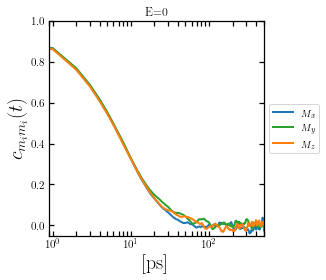

In [16]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,500,-0.05,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')
ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

plt.xlabel(r'[ps]',fontsize=axislabelsize)
plt.ylabel(r'$c_{m_{i}m_{i}}(t)$',fontsize=axislabelsize)
ax.set_title('E=0')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.plot(funcauto(datamxzerotot), color=tableau20[0], lw=2, label=r'$M_{x}$')
plt.plot(funcauto(datamyzerotot), color=tableau20[4], lw=2, label=r'$M_{y}$')
plt.plot(funcauto(datamzzerotot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("corrdd_eq.pdf",bbox_inches='tight')

plt.tight_layout()

In [77]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size/2:]

In [78]:
autocorr(datamxzerotot)

TypeError: slice indices must be integers or None or have an __index__ method

In [69]:
autocorrnew(datamxzerotot)

KeyboardInterrupt: 

In [64]:
autocorr(datamxzerotot)

[1.0,
 1.0547561809549408,
 1.0863680570231125,
 1.0813622245137393,
 1.0945632126907083,
 1.098743880636001,
 1.0799189147329937,
 1.0889334907935295,
 1.096654039789089,
 1.0942610308680807,
 1.0980487814379731,
 1.1035912472791556,
 1.1046853918706436,
 1.1095977406705964,
 1.1141852717007228,
 1.1184577496032349,
 1.122439184805935,
 1.125223663043935,
 1.1280656487979996,
 1.1283550577599257,
 1.1301604265725569,
 1.1256062703212097,
 1.1179417411085482,
 1.0888072889780254,
 1.0527543079384811,
 1.044023417978995,
 1.0368822955009531,
 1.0154545248633309,
 1.002246567018018,
 1.0007272362241222,
 1.0002174170568092,
 1.001411459026394,
 1.0028097431115126,
 1.0045523334341016,
 1.0062194011006453,
 1.0080809158086914,
 1.0099780914634133,
 1.011723500910344,
 1.0095192380014792,
 1.008266840834128,
 1.0041830091472954,
 0.9912121265180636,
 0.980778228420349,
 0.9709466833824187,
 0.9581505962263532,
 0.9454925814764015,
 0.9261338312721011,
 0.9063692298645963,
 0.89759662128461

In [16]:
autocorrnew(datamxzerotot)

[1.0,
 1.2836780270114858,
 1.1338224814887448,
 1.0511531053244962,
 0.956134077453715,
 0.9177703435480171,
 0.9534848312676232,
 0.8912003042646407,
 0.8438507315300061,
 0.7476468318305917,
 0.6856683661803022,
 0.6520678673962501,
 0.6030301548903247,
 0.5922735182609689,
 0.5837113381613735,
 0.5757659556962021,
 0.5691914062991345,
 0.5492785029042084,
 0.5321918642885916,
 0.5056971675001399,
 0.48747916846180156,
 0.4529103991378895,
 0.4143600713733842,
 0.3511883375087275,
 0.28343141381861525,
 0.25048195598635026,
 0.22335539418484168,
 0.17826061510124933,
 0.1445398944350349,
 0.13395704896433755,
 0.12760808829132295,
 0.12835951224242412,
 0.14860842238562622,
 0.15350141329512226,
 0.15747912783605392,
 0.16384118762625913,
 0.17209846559459335,
 0.17771699796304596,
 0.16707315839649714,
 0.15880844475866893,
 0.1445868635497985,
 0.11755627178986734,
 0.09412658699180684,
 0.07220188523823559,
 0.047082634183338204,
 0.02261194779582899,
 -0.00873042022185455,
 -0.0

<ipython-input-109-1f48c83d33b7>:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])


KeyboardInterrupt: 

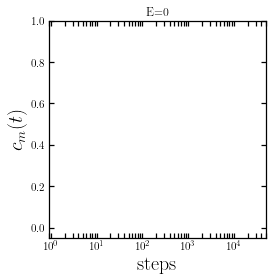

In [109]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,50000,-0.05,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')
ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

plt.xlabel(r'steps',fontsize=axislabelsize)
plt.ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title('E=0')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.plot(autocorrnew(datamxzerotot), color=tableau20[0], lw=2, label=r'$M_{x}$')
plt.plot(autocorrnew(datamyzerotot), color=tableau20[4], lw=2, label=r'$M_{y}$')
plt.plot(autocorrnew(datamzzerotot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

<ipython-input-10-8955dcb86aaf>:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


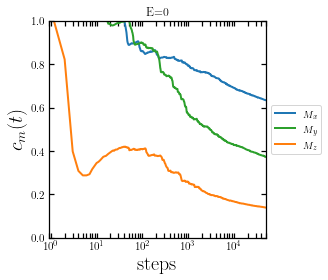

In [10]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,50000,0,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')
ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

plt.xlabel(r'steps',fontsize=axislabelsize)
plt.ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title('E=0')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.plot(autocorr(datamxzerotot), color=tableau20[0], lw=2, label=r'$M_{x}$')
plt.plot(autocorr(datamyzerotot), color=tableau20[4], lw=2, label=r'$M_{y}$')
plt.plot(autocorr(datamzzerotot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

In [22]:
datamx1e2tot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtotx1e2full.dat")
datamy1e2tot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtoty1e2full.dat")
datamz1e2tot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtotz1e2full.dat")

<ipython-input-110-16320d791a25>:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


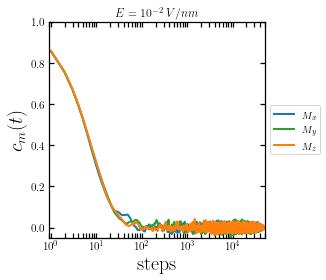

In [110]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,50000,-0.05,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')
ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

plt.xlabel(r'steps',fontsize=axislabelsize)
plt.ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-2}\;V/nm$')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.plot(funcauto(datamx1e2tot), color=tableau20[0], lw=2, label=r'$M_{x}$')
plt.plot(funcauto(datamy1e2tot), color=tableau20[4], lw=2, label=r'$M_{y}$')
plt.plot(funcauto(datamz1e2tot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

<ipython-input-111-16320d791a25>:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


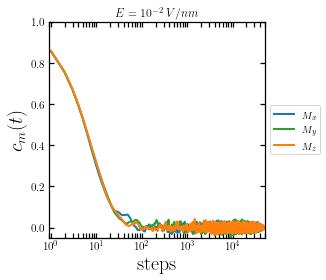

In [111]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,50000,-0.05,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')
ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

plt.xlabel(r'steps',fontsize=axislabelsize)
plt.ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-2}\;V/nm$')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.plot(funcauto(datamx1e2tot), color=tableau20[0], lw=2, label=r'$M_{x}$')
plt.plot(funcauto(datamy1e2tot), color=tableau20[4], lw=2, label=r'$M_{y}$')
plt.plot(funcauto(datamz1e2tot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

In [24]:
datamx1e3tot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtotx1e3full.dat")
datamy1e3tot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtoty1e3full.dat")
datamz1e3tot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtotz1e3full.dat")

<ipython-input-49-4b779058d94f>:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])


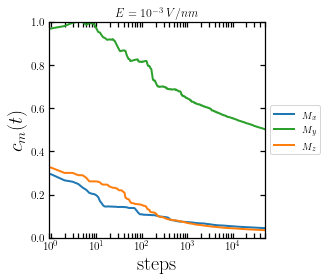

In [49]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,50000,0,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')
ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

plt.xlabel(r'steps',fontsize=axislabelsize)
plt.ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-3}\;V/nm$')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.plot(autocorr(datamx1e3tot), color=tableau20[0], lw=2, label=r'$M_{x}$')
plt.plot(autocorr(datamy1e3tot), color=tableau20[4], lw=2, label=r'$M_{y}$')
plt.plot(autocorr(datamz1e3tot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

<ipython-input-112-641ffc060d59>:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


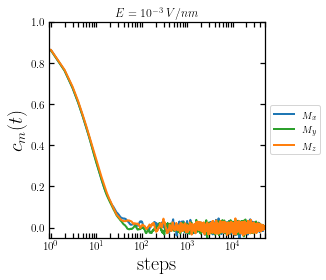

In [112]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,50000,-0.05,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')
ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

plt.xlabel(r'steps',fontsize=axislabelsize)
plt.ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-3}\;V/nm$')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.plot(funcauto(datamx1e3tot), color=tableau20[0], lw=2, label=r'$M_{x}$')
plt.plot(funcauto(datamy1e3tot), color=tableau20[4], lw=2, label=r'$M_{y}$')
plt.plot(funcauto(datamz1e3tot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

In [26]:
datamx1e4tot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtotx1e4full.dat")
datamy1e4tot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtoty1e4full.dat")
datamz1e4tot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtotz1e4full.dat")

<ipython-input-37-78615bdf4521>:16: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])


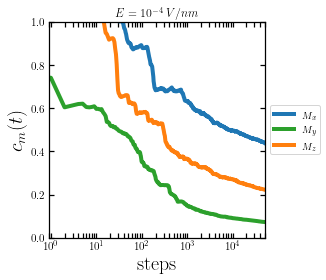

In [37]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,50000,0,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

plt.xlabel(r'steps',fontsize=axislabelsize)
plt.ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-4}\;V/nm$')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.plot(autocorr(datamx1e4tot), color=tableau20[0], lw=4, label=r'$M_{x}$')
plt.plot(autocorr(datamy1e4tot), color=tableau20[4], lw=4, label=r'$M_{y}$')
plt.plot(autocorr(datamz1e4tot), color=tableau20[2], lw=4, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

<ipython-input-113-10d2b0c6775f>:16: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


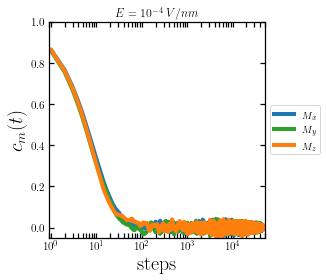

In [113]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,50000,-0.05,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

plt.xlabel(r'steps',fontsize=axislabelsize)
plt.ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-4}\;V/nm$')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.plot(funcauto(datamx1e4tot), color=tableau20[0], lw=4, label=r'$M_{x}$')
plt.plot(funcauto(datamy1e4tot), color=tableau20[4], lw=4, label=r'$M_{y}$')
plt.plot(funcauto(datamz1e4tot), color=tableau20[2], lw=4, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

In [30]:
datamx1e5tot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtotx1e5full.dat")
datamy1e5tot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtoty1e5full.dat")
datamz1e5tot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtotz1e5full.dat")

<ipython-input-47-c9768c81f8b2>:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])


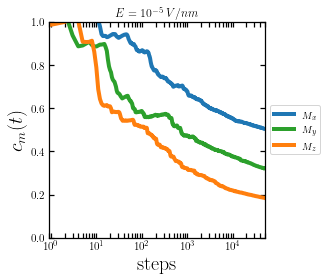

In [47]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,50000,0,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')
ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())
#ax.set_xscale('log')


plt.xlabel(r'steps',fontsize=axislabelsize)
plt.ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-5}\;V/nm$')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.plot(autocorr(datamx1e5tot), color=tableau20[0], lw=4, label=r'$M_{x}$')
plt.plot(autocorr(datamy1e5tot), color=tableau20[4], lw=4, label=r'$M_{y}$')
plt.plot(autocorr(datamz1e5tot), color=tableau20[2], lw=4, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

<ipython-input-114-c65fd54d2cb1>:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


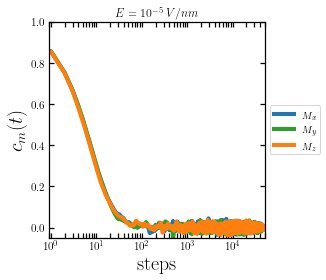

In [114]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,50000,-0.05,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')
ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())
#ax.set_xscale('log')


plt.xlabel(r'steps',fontsize=axislabelsize)
plt.ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-5}\;V/nm$')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.plot(funcauto(datamx1e5tot), color=tableau20[0], lw=4, label=r'$M_{x}$')
plt.plot(funcauto(datamy1e5tot), color=tableau20[4], lw=4, label=r'$M_{y}$')
plt.plot(funcauto(datamz1e5tot), color=tableau20[2], lw=4, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

In [34]:
datamx1e6tot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtotx1e6full.dat")
datamy1e6tot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtoty1e6full.dat")
datamz1e6tot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtotz1e6full.dat")

<ipython-input-48-24335d447307>:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])


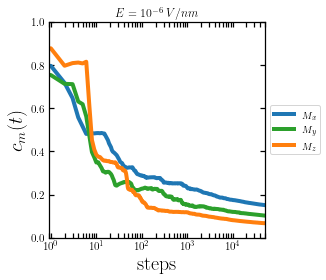

In [48]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,50000,0,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')
ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

plt.xlabel(r'steps',fontsize=axislabelsize)
plt.ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-6}\;V/nm$')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.plot(autocorr(datamx1e6tot), color=tableau20[0], lw=4, label=r'$M_{x}$')
plt.plot(autocorr(datamy1e6tot), color=tableau20[4], lw=4, label=r'$M_{y}$')
plt.plot(autocorr(datamz1e6tot), color=tableau20[2], lw=4, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

<ipython-input-115-273da4647a6c>:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


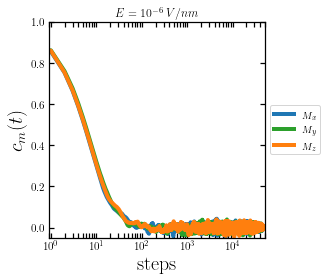

In [115]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,50000,-0.05,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')
ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

plt.xlabel(r'steps',fontsize=axislabelsize)
plt.ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-6}\;V/nm$')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.plot(funcauto(datamx1e6tot), color=tableau20[0], lw=4, label=r'$M_{x}$')
plt.plot(funcauto(datamy1e6tot), color=tableau20[4], lw=4, label=r'$M_{y}$')
plt.plot(funcauto(datamz1e6tot), color=tableau20[2], lw=4, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

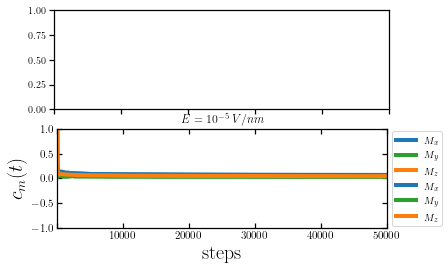

In [157]:
fig, axs = plt.subplots(2,1, sharex='col', sharey='row')


ax=axs[0]
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,50000,-1.0,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')
ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(0.3/ax.get_data_ratio())

ax.set_xlabel(r'steps',fontsize=axislabelsize)
ax.set_ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-5}\;V/nm$')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
#plt.tight_layout()


ax.plot(autocorr(datamx1e5tot), color=tableau20[0], lw=4, label=r'$M_{x}$')
ax.plot(autocorr(datamy1e5tot), color=tableau20[4], lw=4, label=r'$M_{y}$')
ax.plot(autocorr(datamz1e5tot), color=tableau20[2], lw=4, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax=axs[1]
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,50000,-1.0,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')
ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(0.3/ax.get_data_ratio())

ax.set_xlabel(r'steps',fontsize=axislabelsize)
ax.set_ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-5}\;V/nm$')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
#plt.tight_layout()


ax.plot(autocorr(datamx1e5tot), color=tableau20[0], lw=4, label=r'$M_{x}$')
ax.plot(autocorr(datamy1e5tot), color=tableau20[4], lw=4, label=r'$M_{y}$')
ax.plot(autocorr(datamz1e5tot), color=tableau20[2], lw=4, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plt.tight_layout()

<ipython-input-59-d0bbbf1bbf7e>:20: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
<ipython-input-59-d0bbbf1bbf7e>:50: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
<ipython-input-59-d0bbbf1bbf7e>:80: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
<ipython-input-59-d0bbbf1bbf7e>:110: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
<ipython-input-59-d0bbbf1bbf7e>:140: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
<ipython-input-59-d0bbbf1bbf7e>:170: UserWarning: Attempted to set non-positive lef

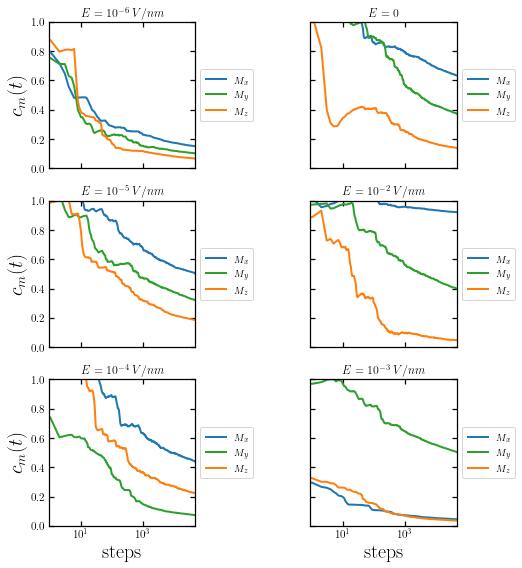

In [59]:
fig, axs = plt.subplots(3,2, sharex='col', sharey='row',figsize=(8, 8))

PLOTRANGE = (0,50000,0,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax=axs[0][0]
#fig, ax = plt.subplots(constrained_layout=True)
#ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

#PLOTRANGE = (0,50000,-1.0,1.0)
#x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)
ax.set_xscale('log')

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

#ax.set_xlabel(r'steps',fontsize=axislabelsize)
ax.set_ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-6}\;V/nm$')

ax.plot(autocorr(datamx1e6tot), color=tableau20[0], lw=2, label=r'$M_{x}$')
ax.plot(autocorr(datamy1e6tot), color=tableau20[4], lw=2, label=r'$M_{y}$')
ax.plot(autocorr(datamz1e6tot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderpad=0.55)


ax=axs[1][0]
#fig, ax = plt.subplots(constrained_layout=True)
#ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

#PLOTRANGE = (0,50000,-1.0,1.0)
#x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)
ax.set_xscale('log')

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

#ax.set_xlabel(r'steps',fontsize=axislabelsize)
ax.set_ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-5}\;V/nm$')

ax.plot(autocorr(datamx1e5tot), color=tableau20[0], lw=2, label=r'$M_{x}$')
ax.plot(autocorr(datamy1e5tot), color=tableau20[4], lw=2, label=r'$M_{y}$')
ax.plot(autocorr(datamz1e5tot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderpad=0.55)


ax=axs[2][0]
#fig, ax = plt.subplots(constrained_layout=True)
#ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

#PLOTRANGE = (0,50000,-1.0,1.0)
#x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)
ax.set_xscale('log')

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

ax.set_xlabel(r'steps',fontsize=axislabelsize)
ax.set_ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-4}\;V/nm$')

ax.plot(autocorr(datamx1e4tot), color=tableau20[0], lw=2, label=r'$M_{x}$')
ax.plot(autocorr(datamy1e4tot), color=tableau20[4], lw=2, label=r'$M_{y}$')
ax.plot(autocorr(datamz1e4tot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderpad=0.55)


ax=axs[2][1]
#fig, ax = plt.subplots(constrained_layout=True)
#ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

#PLOTRANGE = (0,50000,-1.0,1.0)
#x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)
ax.set_xscale('log')

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

ax.set_xlabel(r'steps',fontsize=axislabelsize)
#ax.set_ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-3}\;V/nm$')

ax.plot(autocorr(datamx1e3tot), color=tableau20[0], lw=2, label=r'$M_{x}$')
ax.plot(autocorr(datamy1e3tot), color=tableau20[4], lw=2, label=r'$M_{y}$')
ax.plot(autocorr(datamz1e3tot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderpad=0.55)


ax=axs[1][1]
#fig, ax = plt.subplots(constrained_layout=True)
#ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

#PLOTRANGE = (0,50000,-1.0,1.0)
#x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)
ax.set_xscale('log')

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

#ax.set_xlabel(r'steps',fontsize=axislabelsize)
#ax.set_ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-2}\;V/nm$')

ax.plot(autocorr(datamx1e2tot), color=tableau20[0], lw=2, label=r'$M_{x}$')
ax.plot(autocorr(datamy1e2tot), color=tableau20[4], lw=2, label=r'$M_{y}$')
ax.plot(autocorr(datamz1e2tot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderpad=0.55)


ax=axs[0][1]
#fig, ax = plt.subplots(constrained_layout=True)
#ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

#PLOTRANGE = (0,50000,-1.0,1.0)
#x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)
ax.set_xscale('log')

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

#ax.set_xlabel(r'steps',fontsize=axislabelsize)
#ax.set_ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=0$')

ax.plot(autocorr(datamxzerotot), color=tableau20[0], lw=2, label=r'$M_{x}$')
ax.plot(autocorr(datamyzerotot), color=tableau20[4], lw=2, label=r'$M_{y}$')
ax.plot(autocorr(datamzzerotot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderpad=0.55)
plt.tight_layout()

plt.savefig("dipole_autocorrelations.pdf",bbox_inches='tight')

In [8]:
datamx03tot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtot03xfull.dat")
datamy03tot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtot03yfull.dat")
datamz03tot=np.loadtxt("/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/mathematica/mtot03zfull.dat")

In [9]:
datamx03tot*datamy03tot

array([ 0.01111517,  0.00344947,  0.01308617, ...,  0.00993822,
        0.00240383, -0.01433156])

In [11]:
datamx03tot[0]*datamy03tot[0]

0.011115173395233465

<ipython-input-38-b061fc9dab37>:16: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])


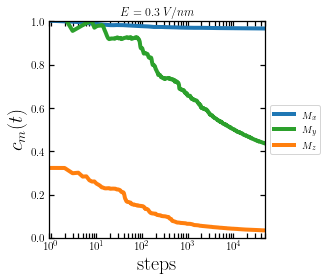

In [38]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,50000,0,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

plt.xlabel(r'steps',fontsize=axislabelsize)
plt.ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=0.3\;V/nm$')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.plot(autocorr(datamx03tot), color=tableau20[0], lw=4, label=r'$M_{x}$')
plt.plot(autocorr(datamy03tot), color=tableau20[4], lw=4, label=r'$M_{y}$')
plt.plot(autocorr(datamz03tot), color=tableau20[2], lw=4, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

# 10nm


In [7]:
datamxzero10nm=np.loadtxt("/home/tasos/sobek_Doc/gromer/PhD_roadmap/MD&electricfield/system10nm/Eeq0/dipoles/mx.dat")
datamyzero10nm=np.loadtxt("/home/tasos/sobek_Doc/gromer/PhD_roadmap/MD&electricfield/system10nm/Eeq0/dipoles/my.dat")
datamzzero10nm=np.loadtxt("/home/tasos/sobek_Doc/gromer/PhD_roadmap/MD&electricfield/system10nm/Eeq0/dipoles/mz.dat")

OSError: /home/tasos/sobek_Doc/gromer/PhD_roadmap/MD&electricfield/system10nm/Eeq0/dipoles/mx.dat not found.

/tmp/ipykernel_92280/686475926.py:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])


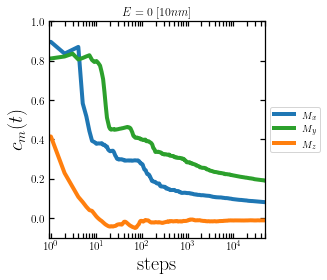

In [12]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,50000,-0.1,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')
ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

plt.xlabel(r'steps',fontsize=axislabelsize)
plt.ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=0\;[10nm]$')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.plot(autocorr(datamxzero10nm), color=tableau20[0], lw=4, label=r'$M_{x}$')
plt.plot(autocorr(datamyzero10nm), color=tableau20[4], lw=4, label=r'$M_{y}$')
plt.plot(autocorr(datamzzero10nm), color=tableau20[2], lw=4, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

In [37]:
#dipole autocorrelations from GROMACS [mol, molsep, total]

In [61]:
datagro_mol=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/dipoles/dipcorr_mol.xvg')
datagro_total=np.loadtxt('/uni-mainz.de/homes/asourpis/Documents/gromer/PhD_roadmap/MD&electricfield/dipoles/dipcorr_total.xvg')

<ipython-input-62-454037dfc345>:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
<ipython-input-19-8a8d947dbeb1>:10: RuntimeWarning: invalid value encountered in true_divide
  res.append((nom+pol)/(den+pol))


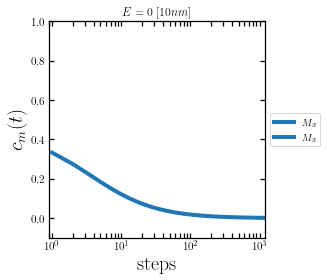

In [62]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,1200,-0.1,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')
ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

plt.xlabel(r'steps',fontsize=axislabelsize)
plt.ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=0\;[10nm]$')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.plot(autocorr(datagro_mol), color=tableau20[0], lw=4, label=r'$M_{x}$')
#plt.plot(autocorr(datamyzero10nm), color=tableau20[4], lw=4, label=r'$M_{y}$')
#plt.plot(autocorr(datamzzero10nm), color=tableau20[2], lw=4, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

<ipython-input-116-0d9ff3d5ee96>:20: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
/localscratch/asourpis/anaconda/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
<ipython-input-116-0d

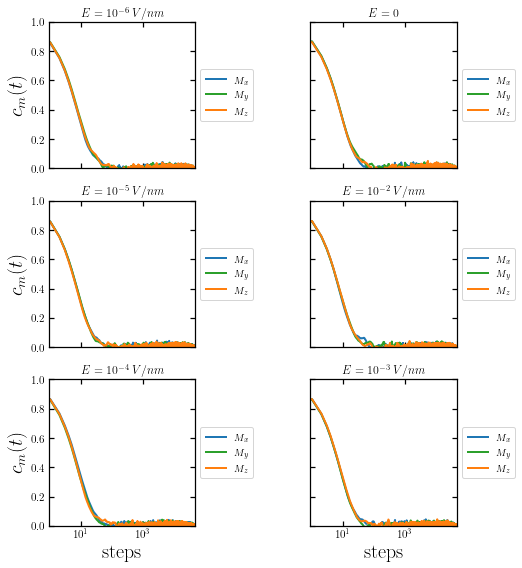

In [116]:
fig, axs = plt.subplots(3,2, sharex='col', sharey='row',figsize=(8, 8))

PLOTRANGE = (0,50000,0,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax=axs[0][0]
#fig, ax = plt.subplots(constrained_layout=True)
#ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

#PLOTRANGE = (0,50000,-1.0,1.0)
#x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)
ax.set_xscale('log')

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

#ax.set_xlabel(r'steps',fontsize=axislabelsize)
ax.set_ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-6}\;V/nm$')

ax.plot(funcauto(datamx1e6tot), color=tableau20[0], lw=2, label=r'$M_{x}$')
ax.plot(funcauto(datamy1e6tot), color=tableau20[4], lw=2, label=r'$M_{y}$')
ax.plot(funcauto(datamz1e6tot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderpad=0.55)


ax=axs[1][0]
#fig, ax = plt.subplots(constrained_layout=True)
#ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

#PLOTRANGE = (0,50000,-1.0,1.0)
#x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)
ax.set_xscale('log')

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

#ax.set_xlabel(r'steps',fontsize=axislabelsize)
ax.set_ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-5}\;V/nm$')

ax.plot(funcauto(datamx1e5tot), color=tableau20[0], lw=2, label=r'$M_{x}$')
ax.plot(funcauto(datamy1e5tot), color=tableau20[4], lw=2, label=r'$M_{y}$')
ax.plot(funcauto(datamz1e5tot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderpad=0.55)


ax=axs[2][0]
#fig, ax = plt.subplots(constrained_layout=True)
#ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

#PLOTRANGE = (0,50000,-1.0,1.0)
#x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)
ax.set_xscale('log')

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

ax.set_xlabel(r'steps',fontsize=axislabelsize)
ax.set_ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-4}\;V/nm$')

ax.plot(funcauto(datamx1e4tot), color=tableau20[0], lw=2, label=r'$M_{x}$')
ax.plot(funcauto(datamy1e4tot), color=tableau20[4], lw=2, label=r'$M_{y}$')
ax.plot(funcauto(datamz1e4tot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderpad=0.55)


ax=axs[2][1]
#fig, ax = plt.subplots(constrained_layout=True)
#ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

#PLOTRANGE = (0,50000,-1.0,1.0)
#x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)
ax.set_xscale('log')

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

ax.set_xlabel(r'steps',fontsize=axislabelsize)
#ax.set_ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-3}\;V/nm$')

ax.plot(funcauto(datamx1e3tot), color=tableau20[0], lw=2, label=r'$M_{x}$')
ax.plot(funcauto(datamy1e3tot), color=tableau20[4], lw=2, label=r'$M_{y}$')
ax.plot(funcauto(datamz1e3tot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderpad=0.55)


ax=axs[1][1]
#fig, ax = plt.subplots(constrained_layout=True)
#ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

#PLOTRANGE = (0,50000,-1.0,1.0)
#x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)
ax.set_xscale('log')

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

#ax.set_xlabel(r'steps',fontsize=axislabelsize)
#ax.set_ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=10^{-2}\;V/nm$')

ax.plot(funcauto(datamx1e2tot), color=tableau20[0], lw=2, label=r'$M_{x}$')
ax.plot(funcauto(datamy1e2tot), color=tableau20[4], lw=2, label=r'$M_{y}$')
ax.plot(funcauto(datamz1e2tot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderpad=0.55)


ax=axs[0][1]
#fig, ax = plt.subplots(constrained_layout=True)
#ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

#PLOTRANGE = (0,50000,-1.0,1.0)
#x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)
ax.set_xscale('log')

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

#ax.set_xlabel(r'steps',fontsize=axislabelsize)
#ax.set_ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=0$')

ax.plot(funcauto(datamxzerotot), color=tableau20[0], lw=2, label=r'$M_{x}$')
ax.plot(funcauto(datamyzerotot), color=tableau20[4], lw=2, label=r'$M_{y}$')
ax.plot(funcauto(datamzzerotot), color=tableau20[2], lw=2, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderpad=0.55)
plt.tight_layout()

plt.savefig("dipole_funcautoelations.pdf",bbox_inches='tight')

In [153]:
from scipy import signal

In [156]:
corr = signal.correlate(datamxzerotot, np.ones(25000), mode='same') / 25000

<ipython-input-157-38d123eba588>:16: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])


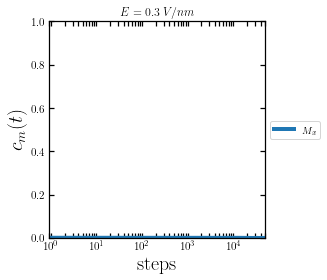

In [157]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,50000,0,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

plt.xlabel(r'steps',fontsize=axislabelsize)
plt.ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=0.3\;V/nm$')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.plot(corr, color=tableau20[0], lw=4, label=r'$M_{x}$')
#plt.plot(autocorr(datamy03tot), color=tableau20[4], lw=4, label=r'$M_{y}$')
#plt.plot(autocorr(datamz03tot), color=tableau20[2], lw=4, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

In [164]:
autocorr = signal.fftconvolve(datamxzerotot, datamxzerotot[::-1], mode='same')

<ipython-input-165-b6fe4ac735c5>:16: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])


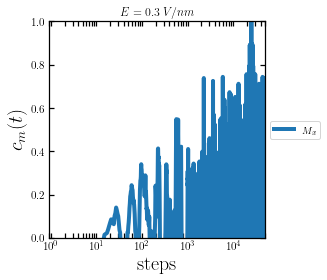

In [165]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
#fig, ax = plt.subplots(constrained_layout=True)
ax=plt.gca()
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labelsize=ticklabelsize)
ax.yaxis.set_tick_params(labelsize=ticklabelsize)

PLOTRANGE = (0,50000,0,1.0)
x = np.linspace(PLOTRANGE[0],PLOTRANGE[1],1)

ax.set_xscale('log')

ax.set_xlim(PLOTRANGE[0],PLOTRANGE[1])
ax.set_ylim(PLOTRANGE[2],PLOTRANGE[3])
ax.set_aspect(1/ax.get_data_ratio())

plt.xlabel(r'steps',fontsize=axislabelsize)
plt.ylabel(r'$c_{m}(t)$',fontsize=axislabelsize)
ax.set_title(r'$E=0.3\;V/nm$')
#ax.plot(bigclst03V_nm[:,0],bigclst03V_nm[:,1],'-',color=tableau20[0],lw=3, label=r'$x_{CCN}$=0.10')
xticks = ax.xaxis.get_major_ticks()
xticks[0].label1.set_visible(False)
plt.tight_layout()


plt.plot(autocorr, color=tableau20[0], lw=4, label=r'$M_{x}$')
#plt.plot(autocorr(datamy03tot), color=tableau20[4], lw=4, label=r'$M_{y}$')
#plt.plot(autocorr(datamz03tot), color=tableau20[2], lw=4, label=r'$M_{z}$')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()